In [13]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from data_processor import DataProcessor

In [14]:
ds = xr.open_dataset("../data.grib")
data = ds.t2m.to_numpy()

AUTOREG_SEQUENCE_LENGTH = 5
processor = DataProcessor(data)
latitude, longitude = processor.get_latitude_longitude()
X, y = processor.preprocess(AUTOREG_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [15]:
model = LinearRegression()
for i in range(len(X_train)):
    model.fit(X_train[i], y_train[i])

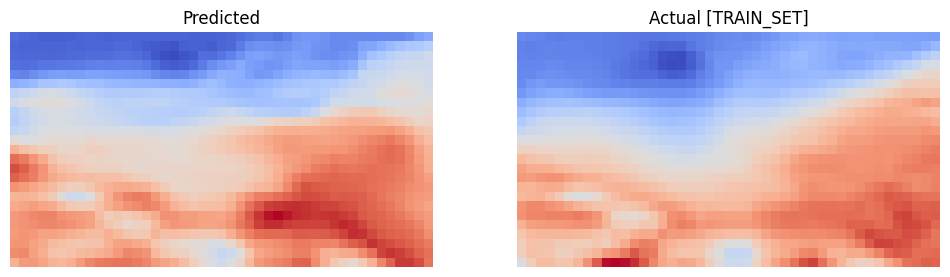

Mean Squared Error: 4.813250708109794
R-squared (R2) Score: 0.46715596823754824


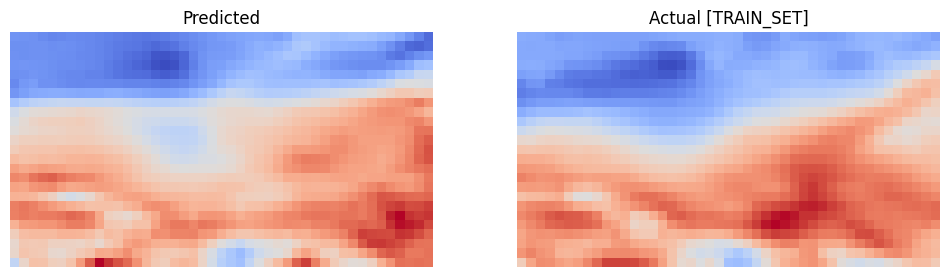

Mean Squared Error: 4.3996970870544265
R-squared (R2) Score: 0.029371987758130436


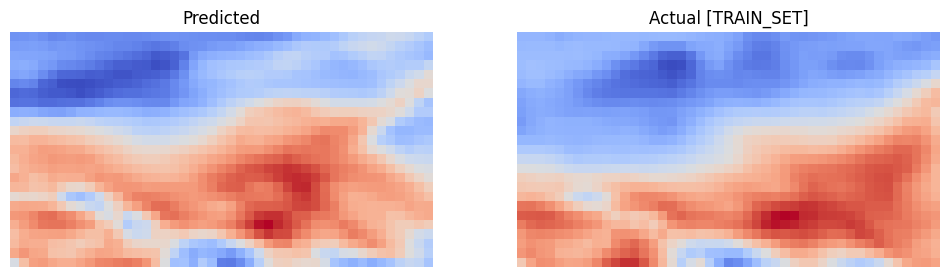

Mean Squared Error: 9.039396039711988
R-squared (R2) Score: -1.0539613893871045


In [16]:
for j in range(3):
    y_hat = model.predict(X_train[j])
    mse = mean_squared_error(y_train[j], y_hat)
    r2 = r2_score(y_train[j], y_hat)
    y_hat = y_hat.reshape(latitude, longitude)
    y_train_sample = y_train[j].reshape(latitude, longitude)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(y_hat, cmap=plt.cm.coolwarm)
    ax[0].set_title('Predicted')
    ax[0].axis('off')
    ax[1].imshow(y_train_sample, cmap=plt.cm.coolwarm)
    ax[1].set_title('Actual [TRAIN_SET]')
    ax[1].axis('off')
    plt.show()
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")

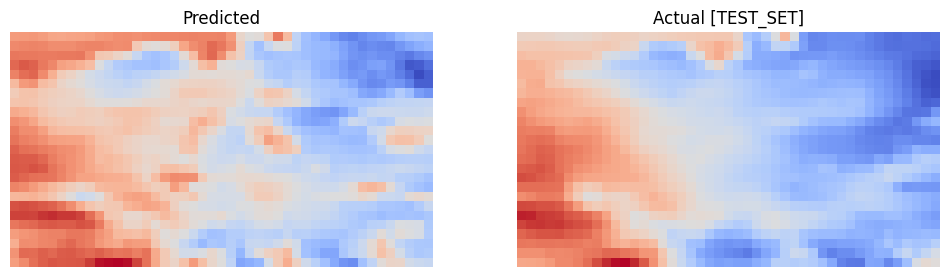

Mean Squared Error: 11.829938996886508
R-squared (R2) Score: -0.7457825695480749


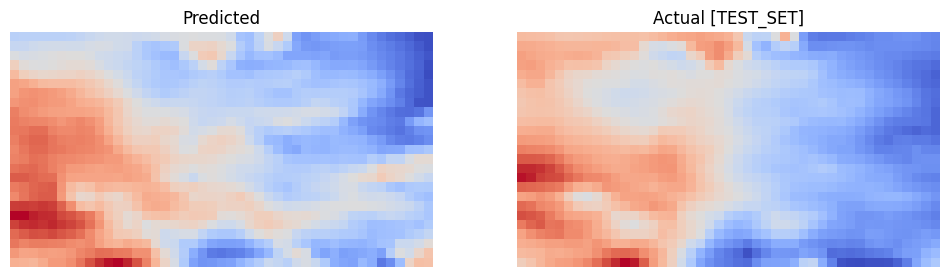

Mean Squared Error: 2.3156144769992584
R-squared (R2) Score: 0.6095959135789554


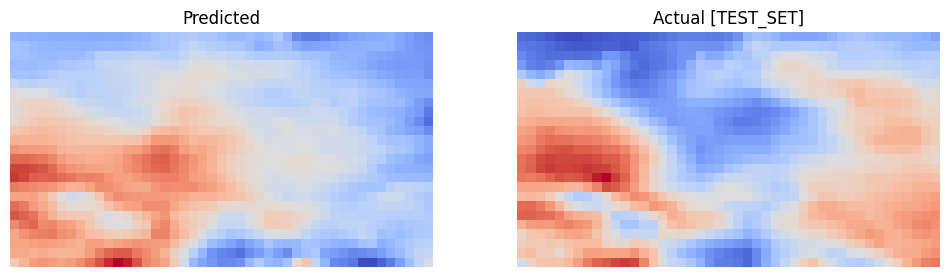

Mean Squared Error: 17.228673794898707
R-squared (R2) Score: -3.903453807398501


In [17]:
for j in range(3):
    y_hat = model.predict(X_test[j])
    mse = mean_squared_error(y_test[j], y_hat)
    r2 = r2_score(y_test[j], y_hat)
    y_hat = y_hat.reshape(latitude, longitude)
    y_test_sample = y_test[j].reshape(latitude, longitude)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(y_hat, cmap=plt.cm.coolwarm)
    ax[0].set_title('Predicted')
    ax[0].axis('off')
    ax[1].imshow(y_test_sample, cmap=plt.cm.coolwarm)
    ax[1].set_title('Actual [TEST_SET]')
    ax[1].axis('off')
    plt.show()
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")

In [7]:
# plt.figure(figsize=(12,10))
# yy = y[0].reshape(1,-1)
# plt.imshow(yy[:,:10], cmap=plt.cm.coolwarm)
# plt.show()